In [1]:
# Importing libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import mean_absolute_error

In [2]:
# Loading the model
age_model = cv2.dnn.readNetFromCaffe("age.prototxt", "dex_chalearn_iccv2015.caffemodel")

In [83]:
def get_face(image_path, scale=0.1):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load image in color mode
    img = cv2.imread(image_path, 1)
    faces = face_cascade.detectMultiScale(img, 1.1, 4)

    for (x, y, w, h) in faces:
        x_start = max(int(x - w * scale), 0)
        y_start = max(int(y - h * scale), 0)
        x_end = min(int(x + w * (1 + scale)), img.shape[1])
        y_end = min(int(y + h * (1 + scale)), img.shape[0])
        face_img = img[y_start:y_end, x_start:x_end]  # Crop the face from the image
        cv2.imwrite('cropped_face.jpg', face_img)  # Save the cropped face to an image file
        return face_img

In [92]:
# Define a function for the prediction step
def get_prediction(img_path):
    """
    This function takes in an image and returns the predicted age.
    """
    img_size = (200, 200)
    face_img = get_face(img_path)
    if face_img is None:
        print("No face detected in the image.")
        return None

    # Display the image
    plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    plt.show()

    img = Image.fromarray(face_img)
    img = img.resize(img_size)

    # Preprocess the image
    img_blob = cv2.dnn.blobFromImage(face_img)
    
    # Set the input to the model
    age_model.setInput(img_blob)
    
    # Get the prediction from the model
    age_result = age_model.forward()

    # Calculate age expected value
    output_indexes = np.array([i for i in range(0, 101)])
    prediction = round(np.sum(age_result * output_indexes), 2)

    return prediction

In [72]:
# Reading an image

img = cv2.imread("../../02_Data/Test Photos/nakano-ruben200.jpg")

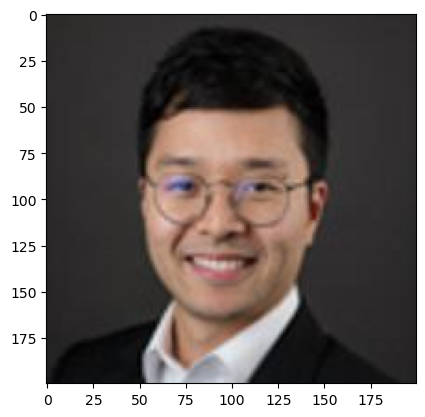

In [73]:
plt.imshow(img[:,:,::-1])

In [74]:
img.shape

(200, 200, 3)

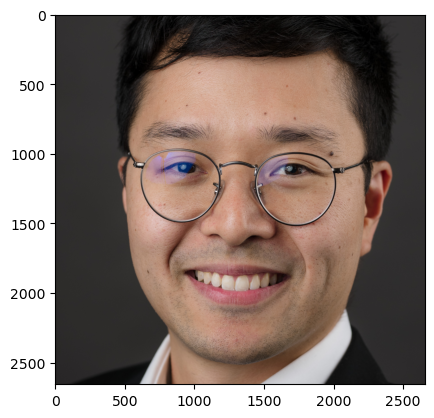

In [95]:
get_prediction("../../02_Data/Test Photos/nakano-ruben.jpg")

In [71]:
def increase_image_size(input_path, output_path, new_size):
    try:
        with Image.open(input_path) as im:
            resized_image = im.resize(new_size)
            resized_image.save(output_path)
        print("Image size increased successfully.")
    except IOError:
        print("Cannot increase image size.")

# Example usage
input_path = "../../02_Data/Test Photos/nakano-ruben2.jpg"
output_path = "../../02_Data/Test Photos/nakano-ruben200.jpg"
new_size = (200, 200)

increase_image_size(input_path, output_path, new_size)


Image size increased successfully.
